# Project Part 1

# Classification Task:

In this section, we find the best classifier that can be used to predict the variable - 'Attrition' based on the various features present in the dataset.

As in our case, it is critical to classify Attrition correctly we will be considering Recall of 1 (as we wish to have less False Negatives predicted by our model) along with overall accuracy for our evaluation metric of the model.

### Dataset: IBM HR Analytics Employee Attrition & Performance
### Classification Problem: Predict attrition rate of the company
### Source: Kaggle
### Model Evaluation Technique: Best Recall value and Best F1 Score


In [2]:
import numpy as np
import pandas as pd
import warnings
import  matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [4]:
df=pd.read_csv('C:/Users/Admin/Desktop/Datasets/HR.csv')

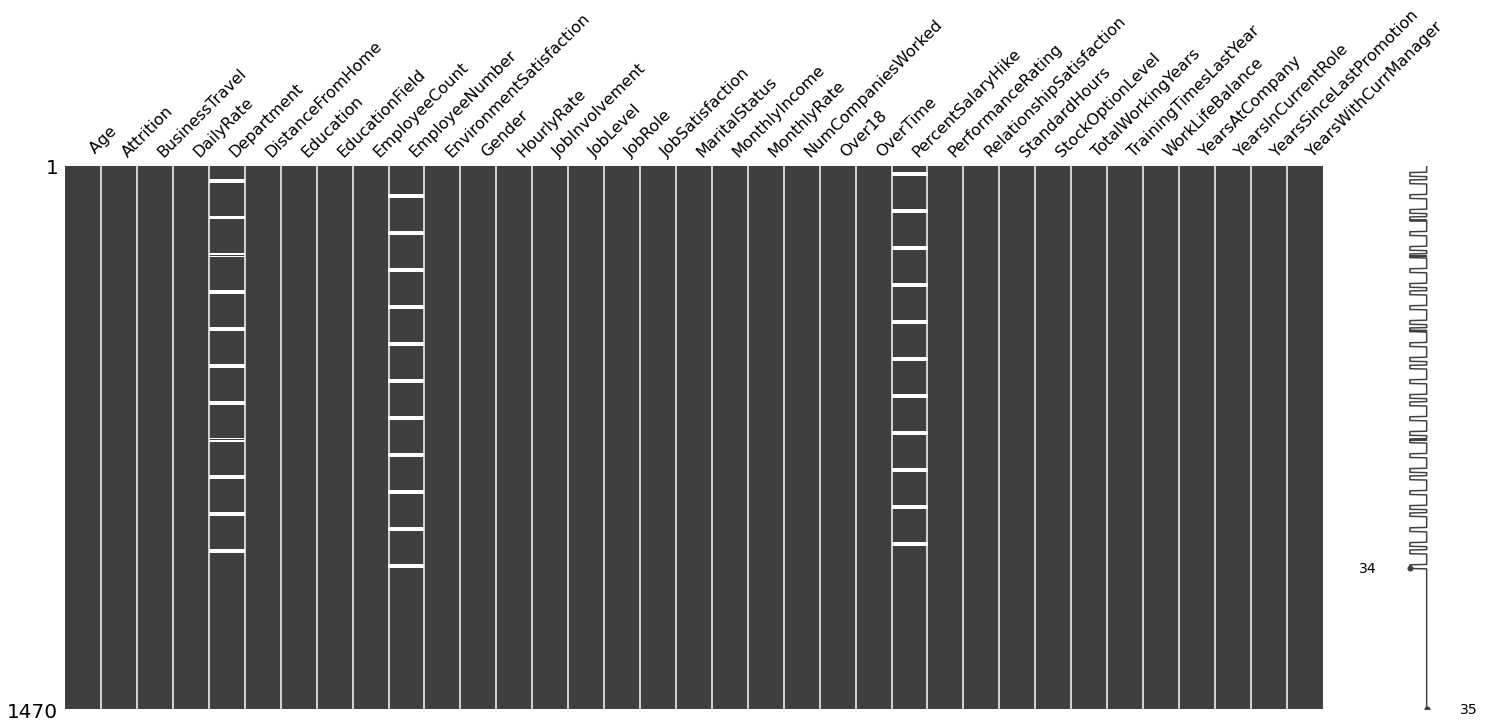

In [5]:
msno.matrix(df) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    Age                      1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1355 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1349 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Finding the sum of missing value for each column

In [7]:
df.isnull().sum()

 Age                          0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                  115
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber              121
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike           121
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## Missing Value Imputation
### Filling the missing values of 'PercentSalaryHike' by using the mean imputation method

In [8]:
df['PercentSalaryHike']=df['PercentSalaryHike'].fillna(df.groupby('PerformanceRating')['PercentSalaryHike'].transform('mean'))

### Filling the missingvalues of Department by considering the respective Job Role to that department

In [9]:

for i in range(len(df['Department'])):
    if df['Department'].isna()[i]==True:
        if df['JobRole'][i]=='Healthcare Representative':
            df['Department'][i]='Research & Development'
        elif df['JobRole'][i]=='Human Resources':
            df['Department'][i]='Human Resources'
        elif df['JobRole'][i]=='Laboratory Technician':
            df['Department'][i]='Research & Development'
        elif df['JobRole'][i]=='Manufacturing Director':
            df['Department'][i]='Research & Development'
        elif df['JobRole'][i]=='Research Director':
            df['Department'][i]='Research & Development'
        elif df['JobRole'][i]=='Research Scientist':
            df['Department'][i]='Research & Development'
        elif df['JobRole'][i]=='Sales Executive':
            df['Department'][i]='Sales'
        elif df['JobRole'][i]=='Sales Representative':
            df['Department'][i]='Sales'

C:\Users\Admin\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Admin\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\.conda\envs\gputest\li

In [10]:
df = df.drop(['EmployeeNumber'],axis = 1)
df = df.drop(['Over18'],axis = 1)
df.columns

Index([' Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Removing the unwanted EmployeeNumber and Over18 column

In [11]:
df=df.drop(['EmployeeCount'],axis=1)

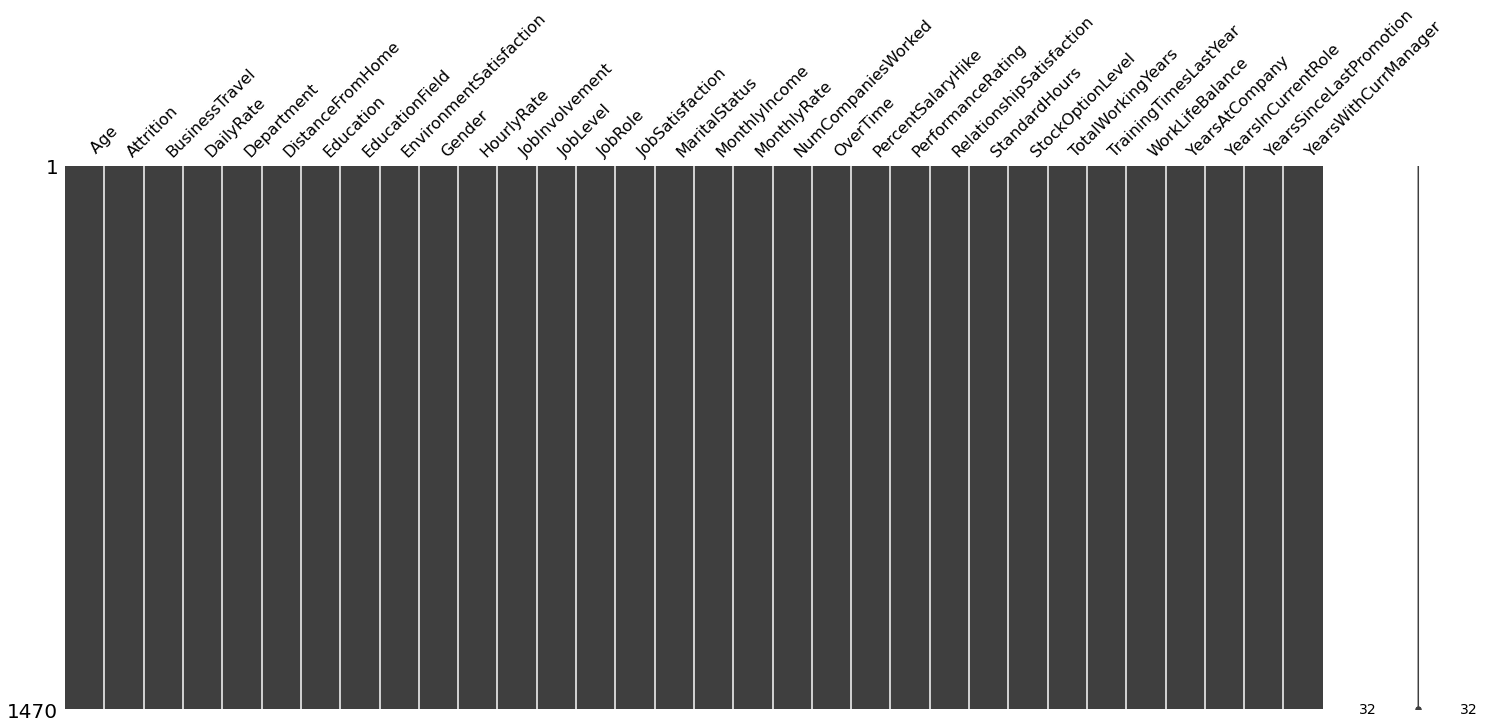

In [12]:
msno.matrix(df) 

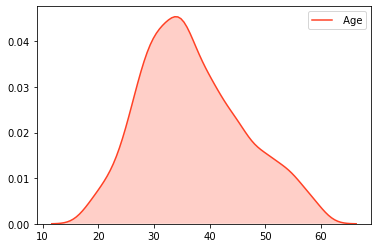

In [13]:
sns.kdeplot(df[' Age'],shade=True,color='#ff4125')

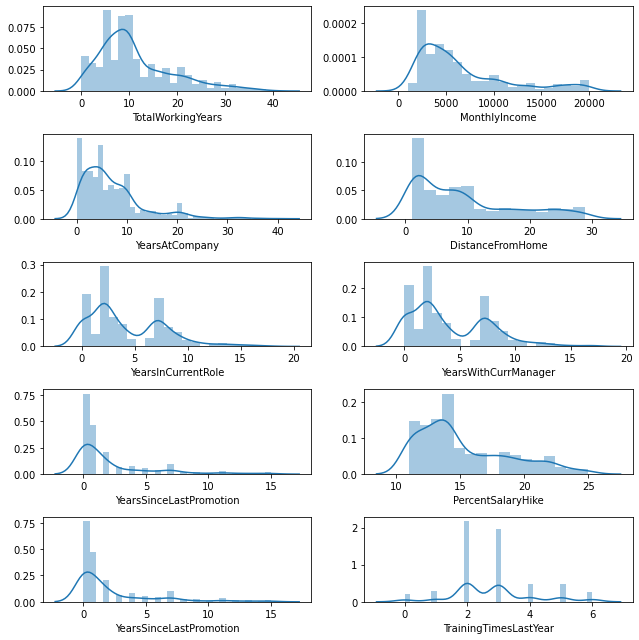

In [14]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

Standard scaler is used when the datapoints are having a guassian distribution i.e. most of the datapoitns lie around the mean of that feature. 

From the above graph, we can say that the datapoints of the feature may not have a gaussian distribution as the datapoints do not lie around the mean of that feature.

Thus, we will prefer to use MinMaxScaler compared to Standard Scaler.

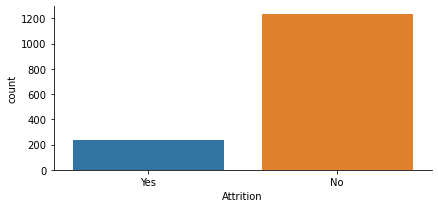

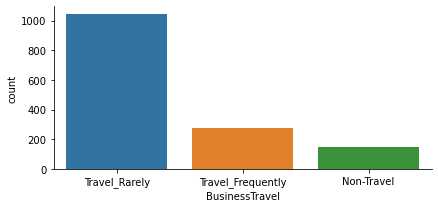

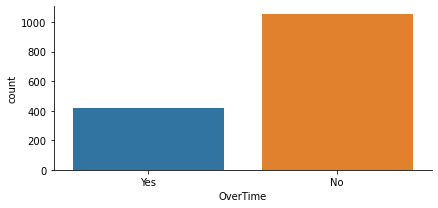

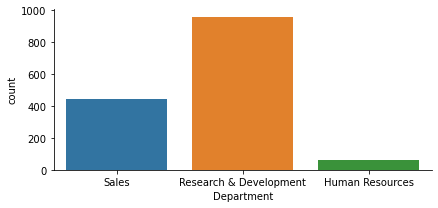

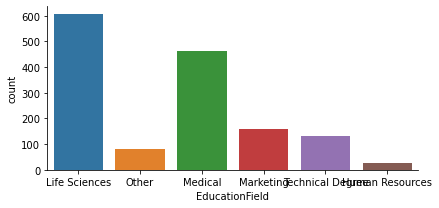

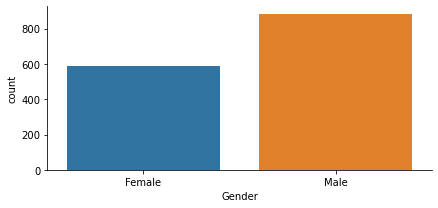

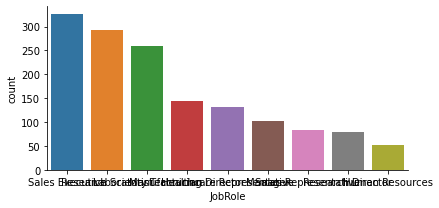

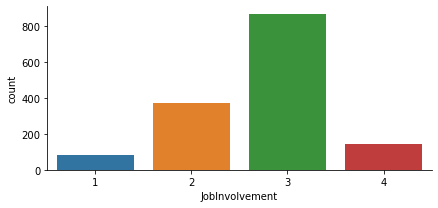

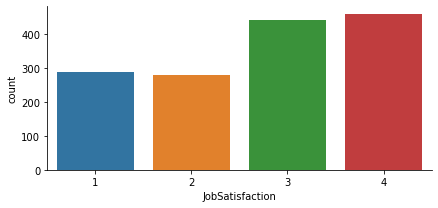

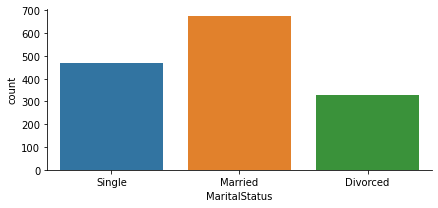

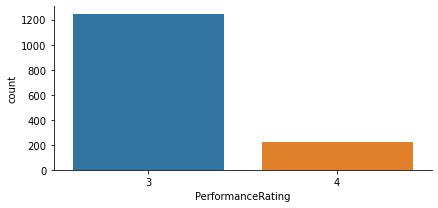

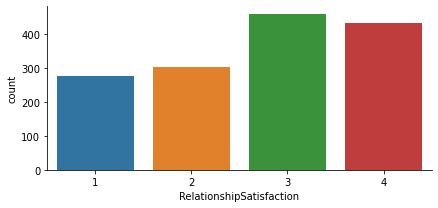

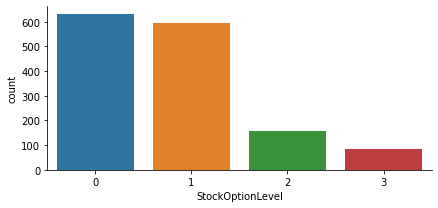

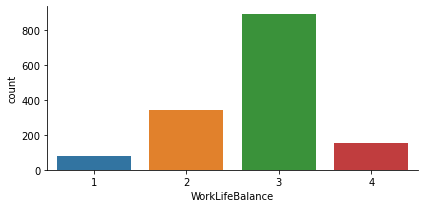

In [14]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
               
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='Attrition') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='BusinessTravel') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='OverTime') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='Department') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='EducationField')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='Gender') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='JobRole')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='JobInvolvement')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='JobSatisfaction')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='MaritalStatus')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='PerformanceRating')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='RelationshipSatisfaction')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='StockOptionLevel')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='WorkLifeBalance')
plt.tight_layout()
plt.show()

### Making Correlation Matrix to find the relations between the variables

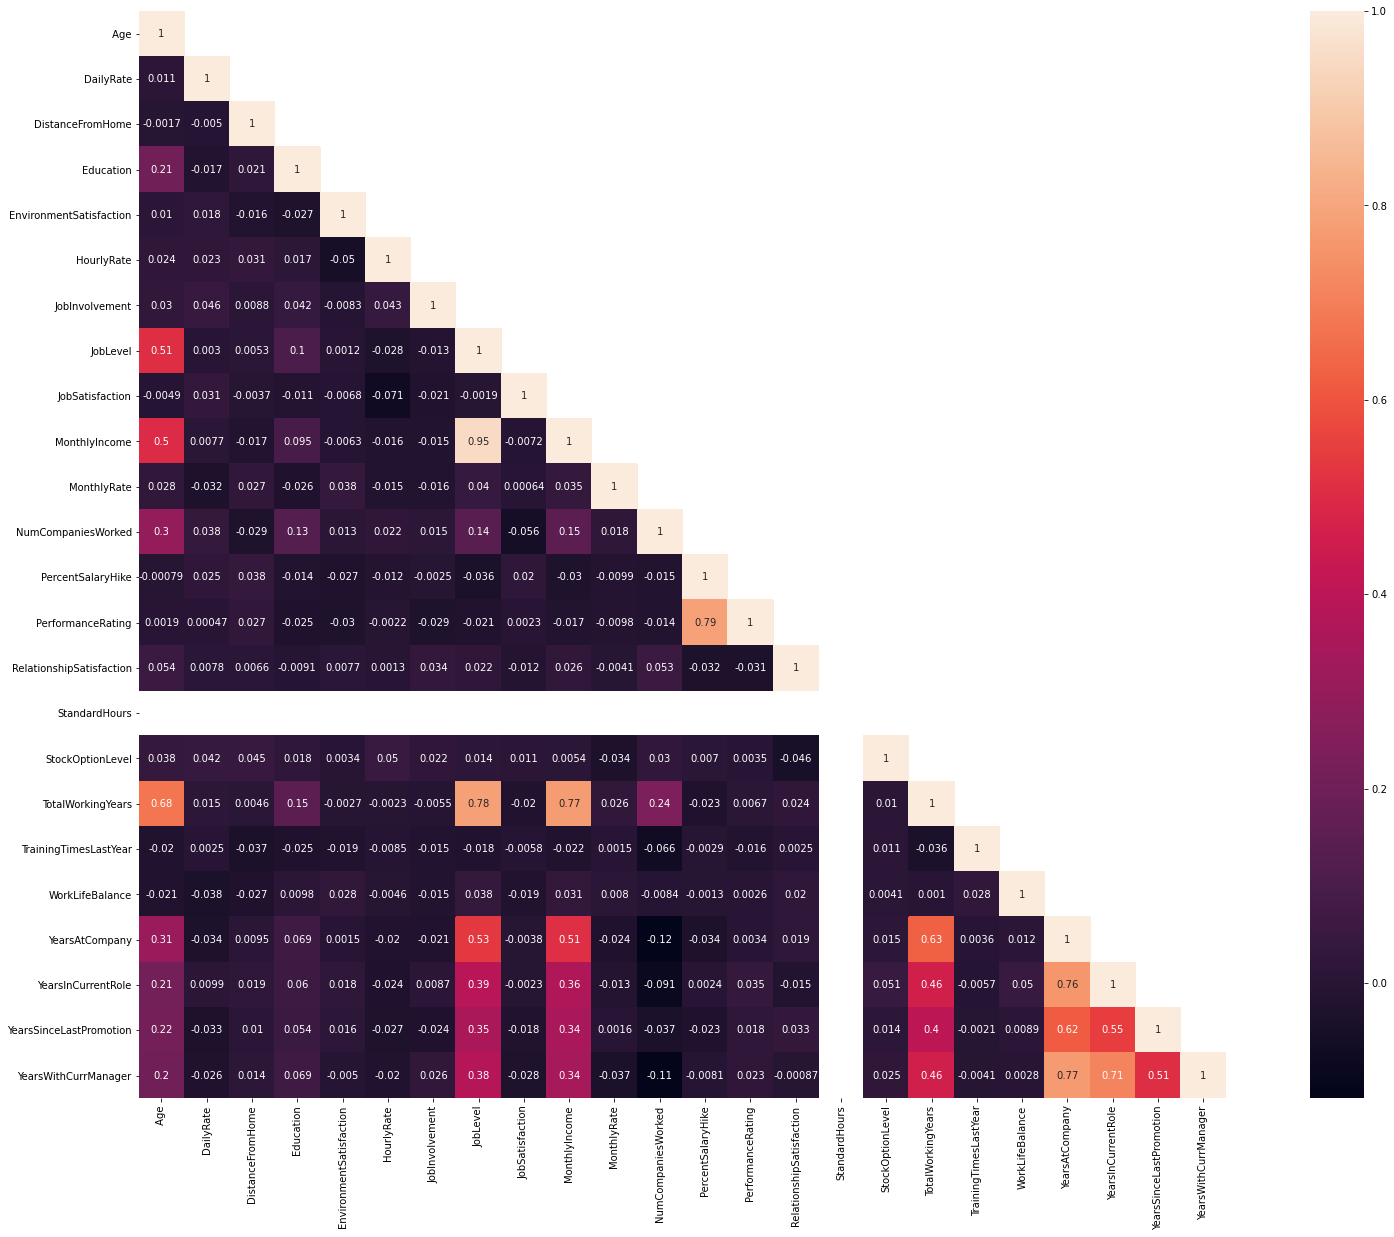

In [15]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

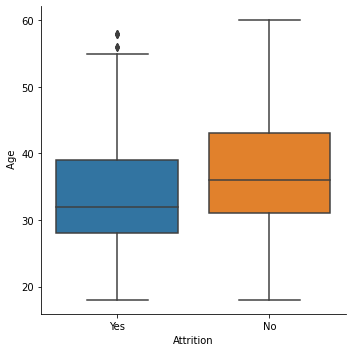

In [16]:
sns.factorplot(data=df,y=' Age',x='Attrition',size=5,aspect=1,kind='box')

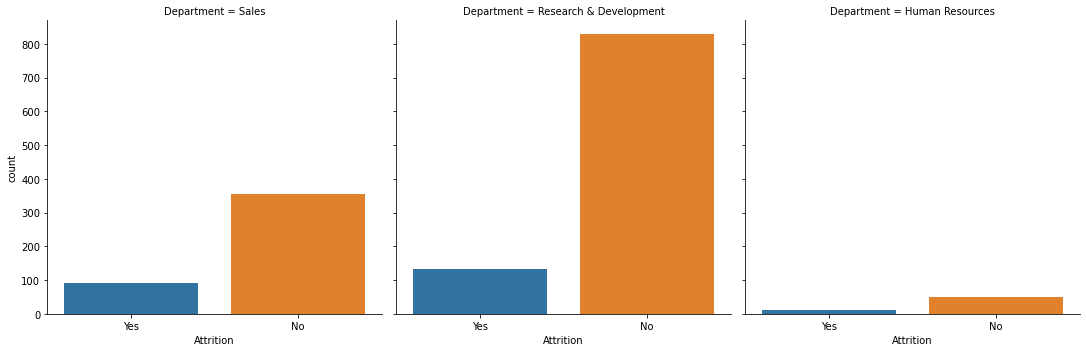

In [17]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [18]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


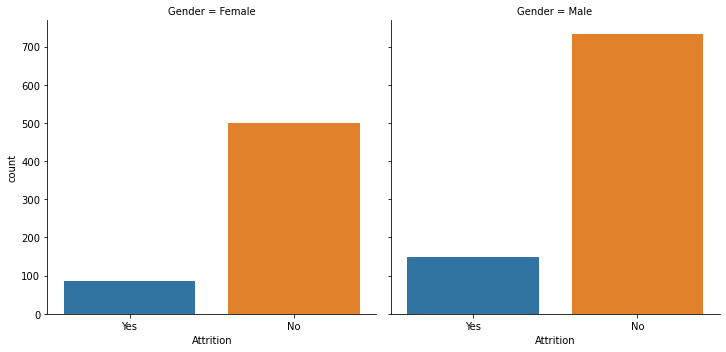

In [19]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Gender')

In [20]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


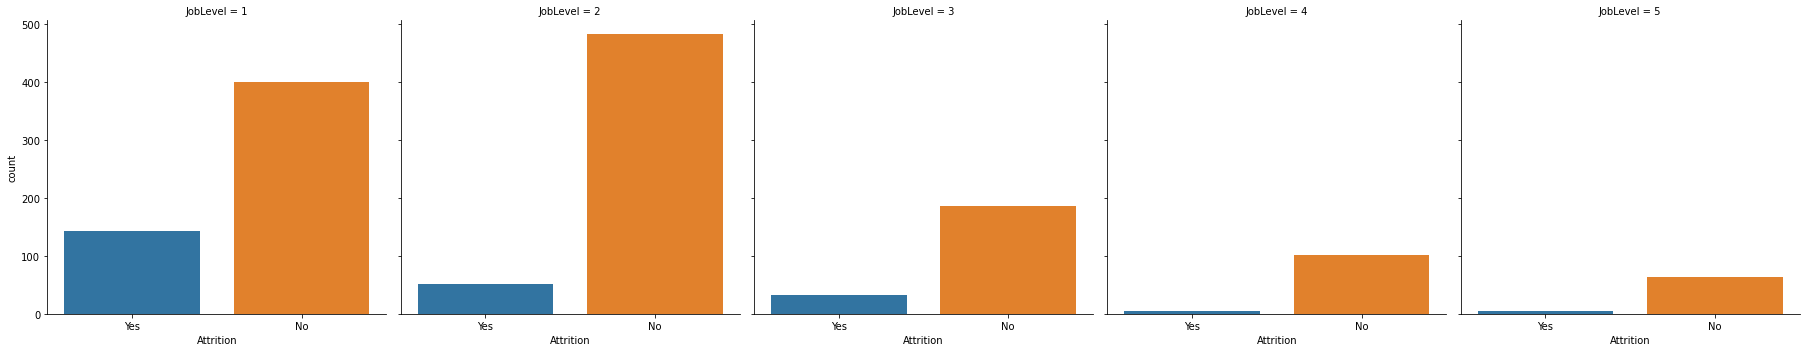

In [21]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobLevel')

In [22]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


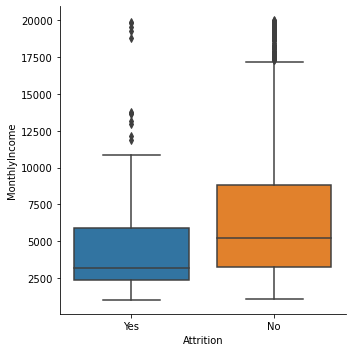

In [23]:
sns.factorplot(data=df,y='MonthlyIncome',x='Attrition',size=5,aspect=1,kind='box')

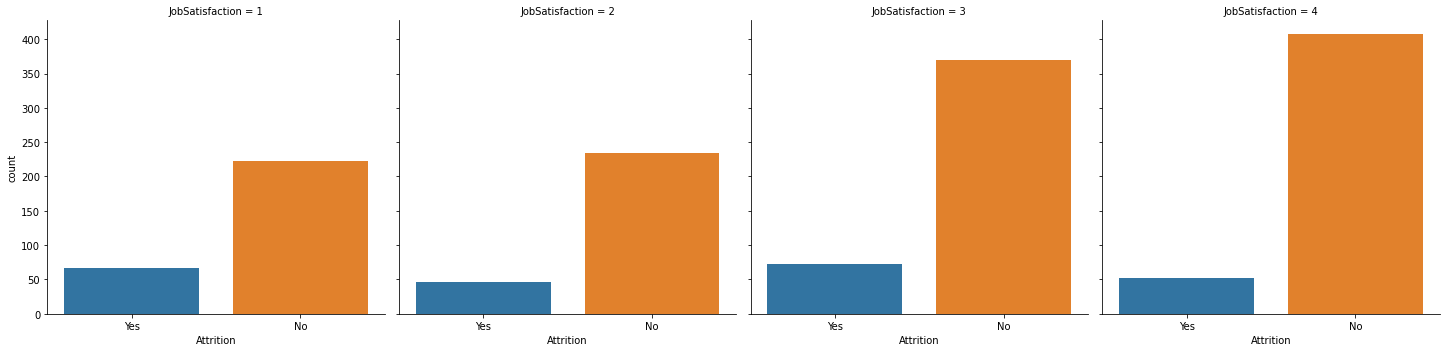

In [24]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [25]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


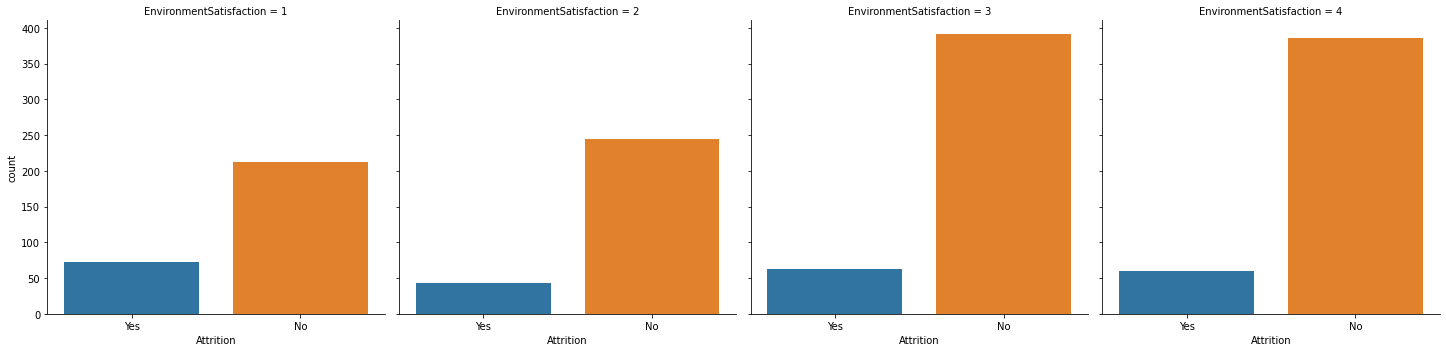

In [26]:
sns.factorplot(data=df,kind='count',x='Attrition',col='EnvironmentSatisfaction')

In [27]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


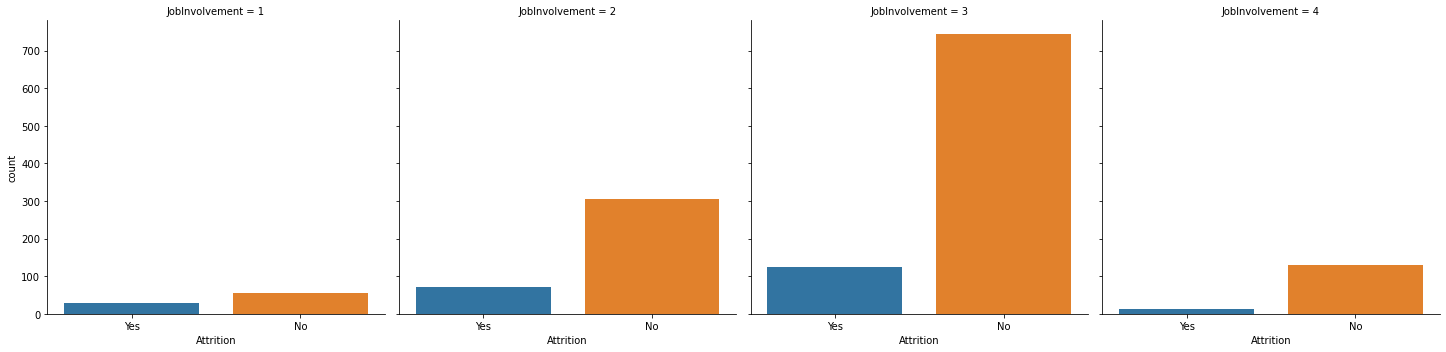

In [28]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobInvolvement')

In [29]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


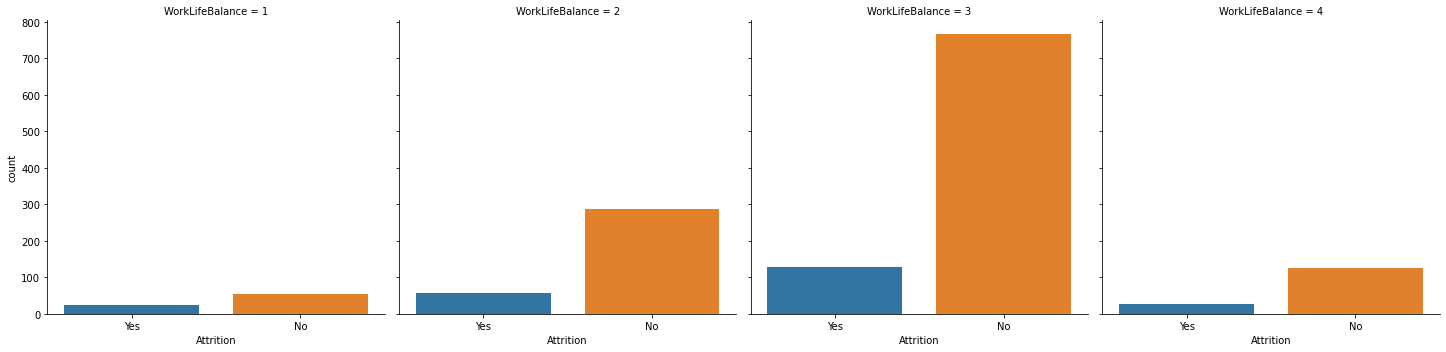

In [30]:
sns.factorplot(data=df,kind='count',x='Attrition',col='WorkLifeBalance')

In [31]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


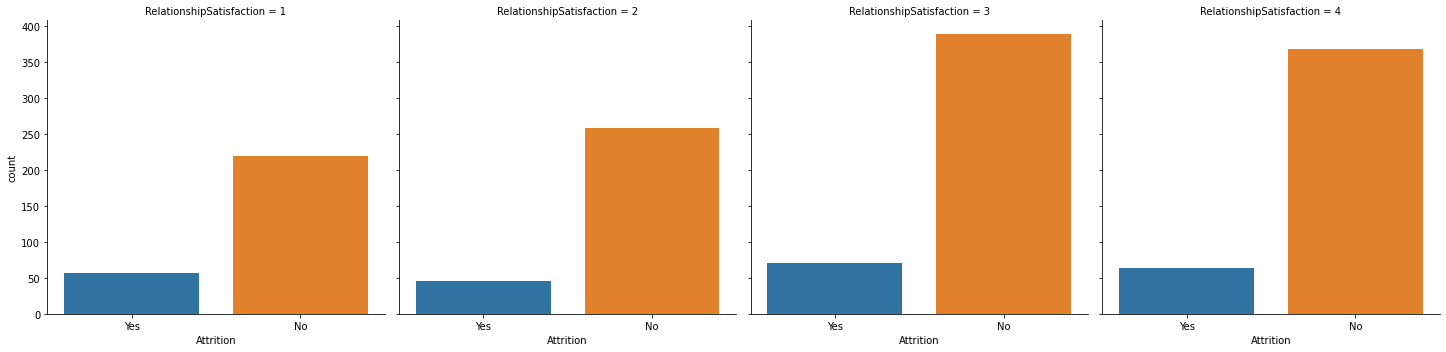

In [32]:
sns.factorplot(data=df,kind='count',x='Attrition',col='RelationshipSatisfaction')

In [33]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

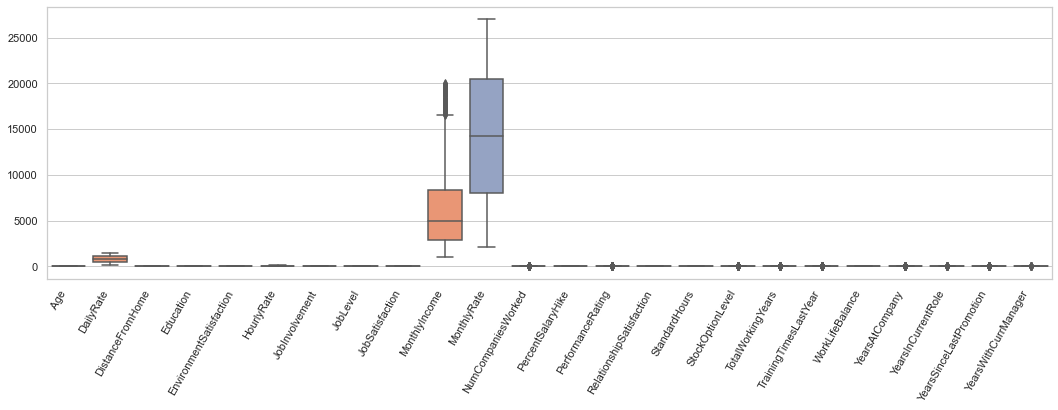

In [34]:
plt.figure(figsize=(18,5))

sns.set(style="whitegrid")
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.xticks(rotation=60, ha="right")

### Mapping the values to the ordinal variable

In [15]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype(int)
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0}).astype(int)

### Mapping overtime variable

In [16]:
df['OverTime'] = df['OverTime'].map({'Yes':0, 'No':1}).astype(int)

### Using dummy variable to convert categorical variables to numerical variables

In [17]:
dummy1 = pd.get_dummies(df['EducationField'])
dummy2 = pd.get_dummies(df['JobRole'])
dummy3 = pd.get_dummies(df['MaritalStatus'])

### Using dummy variable to convert categorical variables to numerical variables

In [19]:
dummy4=pd.get_dummies(df['Department'])

### Joining the original dataframe and all the dummy variables produced


In [20]:
df=pd.concat([df,dummy1,dummy2,dummy3,dummy4],axis=1)

### Dropping the original variables from the dataframe

In [21]:

df=df.drop(['EducationField','JobRole','MaritalStatus','Department'],axis=1)

### Mapping Attrition variable

In [22]:
df['Attrition'] = df['Attrition'].map({'Yes':0, 'No':1}).astype(int)

### Attrition column will be assigned to Y and all other variables are assigned to X

In [23]:
X=df.drop(['Attrition'],axis=1)
Y=df['Attrition']

### Making Correlation Matrix to find the relations between the variables

In [24]:
X.shape

(1470, 48)

From the shape function on X, we know that the dataframe has *1470 data points* and *48 features* that can be used to predict 'Attrition' stored in y. 

The different classification models that can be used for this task are:
- KNN Classification
- Logistic Regression
- Support Vector Machine - Linear SVC
- Support Vector Machine with Kernel trick – Rbf, Poly
- Decision Tree

But before we start applying these classification models, a three-fold split is performed on the entire dataset

Thus, we fit the above models using train and validation set and after finding the best classifier, we check for the accuracy of the best classifier using test set.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X,Y, random_state = 2)

# split train+validation set into training and validation sets
X_train_org, X_valid_org, y_train, y_valid = train_test_split(X_trainval_org, y_trainval, random_state=1)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_valid = scaler.fit_transform(X_valid_org)
X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.transform(X_test_org)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 826   size of validation set: 276   size of test set: 368



From the results, it can be said that the training set has 826 data points, validation set has 276 data points and testing set has 368 data points.

Let us fit model - KNN Classifier using train and validation set and find the best parameter - *'K'* using naive grid search.

## KNN Classification



Best score: 0.84
Best parameters: {'K': 8}


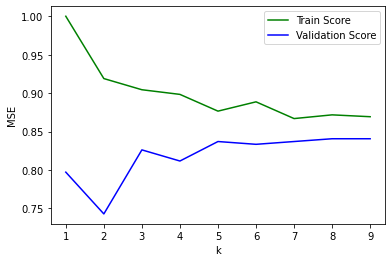

In [26]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    train_score_array.append(knn_clf.score(X_train, y_train))
    score = knn_clf.score(X_valid, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of K for this model is 8 which gives an accuracy of 0.84 on the validation dataset.

We review this parameter using cross validation:

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8018018  0.83783784 0.86363636 0.86363636 0.88181818 0.85454545
 0.86363636 0.84545455 0.84545455 0.86363636]
Average cross-validation score: 0.85


The average cross-validation score for the parameter K = 8 is 0.85 

Let us find the best parameter for this model using GridSearchCV:

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.85


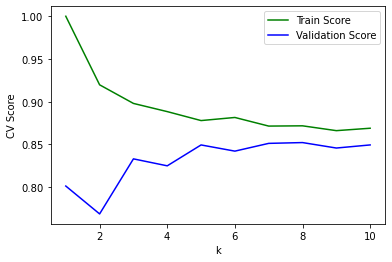

In [32]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

grid_search_knn.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search_knn.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('CV Score')

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

The best parameter for this model using GridSearchCV is 8. Eventhough we found the best parameter as K = 8  using the naive grid search, but with parameter K = 8, the average cross validation is 0.85 which is better than the average cross validation of the naive grid search. 

0.8396739130434783
              precision    recall  f1-score   support

           0       0.60      0.15      0.23        62
           1       0.85      0.98      0.91       306

    accuracy                           0.84       368
   macro avg       0.72      0.56      0.57       368
weighted avg       0.81      0.84      0.80       368



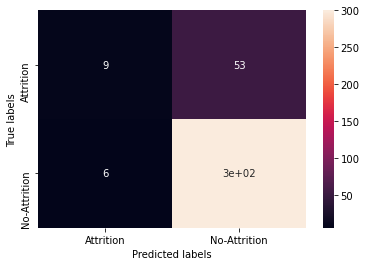

In [34]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

pred_knn = grid_search_knn.predict(X_test)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_knn))

In [35]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[0]))
print ('F1-Score    : {}'.format(fscore[0]))

Recall    : 0.14516129032258066
F1-Score    : 0.2337662337662338


Thus, the accuracy,recall and f1-score of this model for the best parameter - K are 0.839,0.145 and 0.234 respectively

In [50]:
Classification_Scores={}

Classification_Scores.update({'KNN Classification':[metrics.accuracy_score(y_test,pred_knn),recall[0],fscore[0]]})

In [51]:
columns = ['Classifier','Best Parameters','Accuracy_Score','Recall of 0']
clf_model_para = pd.DataFrame(columns=columns)

clf_model_para=clf_model_para.append({'Classifier':'KNN Classification',
                                      'Best Parameters':grid_search_knn.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_knn),
                                      'Recall of 0':recall[0]},ignore_index=True)

## Logistic Regression



Best score: 0.89
Best parameters: {'C': 1, 'penalty': 'l2'}


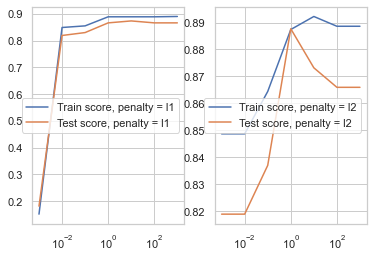

In [52]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver ='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver='lbfgs')
    
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    
    score = log_l1.score(X_valid, y_valid)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_valid, y_valid)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of C and Penalty for this model are 1 and `l2` respectively which gives a score of 0.88 on the validation dataset.

We review this parameter using cross validation.

In [53]:
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C)

scores = cross_val_score(log_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88288288 0.86486486 0.87272727 0.90909091 0.9        0.89090909
 0.82727273 0.87272727 0.88181818 0.90909091]
Average cross-validation score: 0.88


The average cross-validation score for the best parameters (1 and `l2`) is 0.87.

Let us find the best parameter for this model using GridSearchCV:

In [54]:
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_log = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_log.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.88


The best parameter for this model using GridSearchCV is `C=10` and `penalty = l2` giving average cross-validation score same as that of naive grid search.

Thus, we will choose the best parameter for Logistic Regression as `C=10` and `penalty = l2`.

0.875
              precision    recall  f1-score   support

           0       0.83      0.32      0.47        62
           1       0.88      0.99      0.93       306

    accuracy                           0.88       368
   macro avg       0.86      0.65      0.70       368
weighted avg       0.87      0.88      0.85       368



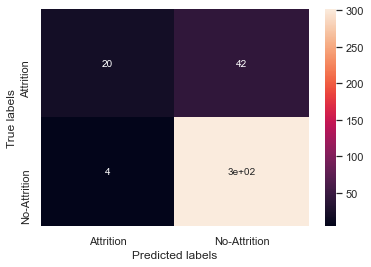

In [55]:
pred_log = grid_search_log.predict(X_test)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_log))

In [56]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3225806451612903
F1Score    : 0.4651162790697674


Thus, the accuracy,recall and f1 score of this model for the best parameter - C=10 and penalty = l2 are 0.875,0.35 and 0.49

In [57]:
Classification_Scores.update({'Logistic Classification':[metrics.accuracy_score(y_test,pred_log),recall[0],fscore[0]]})

In [58]:
clf_model_para=clf_model_para.append({'Classifier':'Logistic Classification',
                                      'Best Parameters':grid_search_log.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_log),
                                      'Recall of 0':recall[0]},ignore_index=True)

## Support-Vector Machine

Let us apply some SVM models on this dataset.

### LinearSVC


Best score: 0.89
Best parameters: {'C': 1}


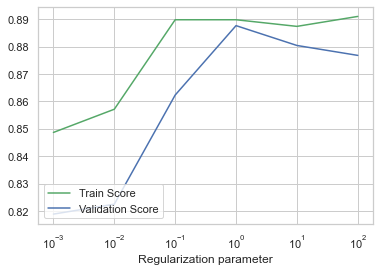

In [59]:
from sklearn.svm import LinearSVC

train_score_list = []
valid_score_list = []

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    linear_svc = LinearSVC(C=C, max_iter=10000)
    linear_svc.fit(X_train,y_train)
    train_score_list.append(linear_svc.score(X_train,y_train))
    score = linear_svc.score(X_valid, y_valid)
    valid_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
        best_C = C

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization parameter')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Using LinearSVC, we get a score of 0.89 for the regularization parameter C = 1.

Lets check the average cross-validation score for this parameter C = 1.

In [60]:
linear_svc_grid = LinearSVC(C = best_C, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_trainval, y_trainval, cv = 10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.84684685 0.87387387 0.86363636 0.90909091 0.9        0.89090909
 0.83636364 0.86363636 0.89090909 0.9       ]
Average cross-validation score: 0.88


We get an average cross-validation score of 0.87 for C = 1. 

The average cross validation score using GridSearchCV is given by:

Best parameters: {'C': 10}
Best cross-validation score: 0.88


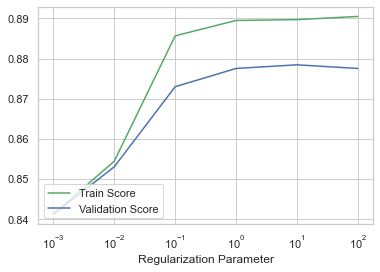

In [61]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lsvc = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_lsvc.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search_lsvc.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

From the results of both the grid search methods - naive grid search and GridSearchCV, we get the same average cross-validation score of 0.87 for regularization parameter `c=1` compared to naive grid search. 

Also, from the above graph we see that for this model, with the increase in the value of regularization parameter i.e. when less regularization is done, the model has more features and performs better compared to when more regularization is done. 

0.8722826086956522
              precision    recall  f1-score   support

           0       0.78      0.34      0.47        62
           1       0.88      0.98      0.93       306

    accuracy                           0.87       368
   macro avg       0.83      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



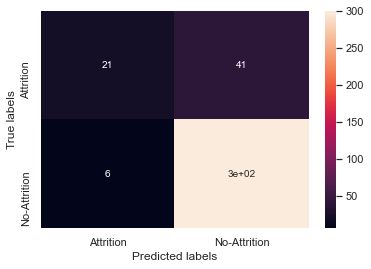

In [62]:
pred_linear_svc = grid_search_lsvc.predict(X_test)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_linear_svc))

In [63]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3387096774193548
F1Score    : 0.47191011235955055


Thus, the accuracy,recall and F1Score of this model for the best parameter - C=1 are 0.8722,0.34 and 0.47 respectively

In [64]:
Classification_Scores.update({'Linear_SVC':[metrics.accuracy_score(y_test,pred_linear_svc),recall[0],fscore[0]]})

In [65]:
clf_model_para=clf_model_para.append({'Classifier':'Linear_SVC',
                                      'Best Parameters':grid_search_lsvc.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_linear_svc),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC - rbf

The hyper-parameters for this model are `gamma` and regularlization term `C`.

In [66]:
from sklearn.svm import SVC

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        score = svc_rbf.score(X_valid, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'gamma': 0.01, 'C': 100}


The best paramaters for this kernel are `gamma = 0.01` and `C = 100` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [67]:
svc_rbf_grid = SVC(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svc_rbf_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.85585586 0.86486486 0.89090909 0.90909091 0.89090909 0.89090909
 0.84545455 0.85454545 0.88181818 0.9       ]
Average cross-validation score: 0.88


From the results of both the grid search methods - we got the average cross validation score is 0.88. 

Let us check for the average cross-validation score using GridSearchCV.

In [68]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svcr = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, return_train_score=True)

grid_search_svcr.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_svcr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcr.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are C = 100 and gamma = 0.1. Compared to the best parameters we got from naive grid search (C = 100 and gamma = 0.01), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are `C = 100` and `gamma = 0.1`. 

0.8777173913043478
              precision    recall  f1-score   support

           0       0.84      0.34      0.48        62
           1       0.88      0.99      0.93       306

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.87      0.88      0.86       368



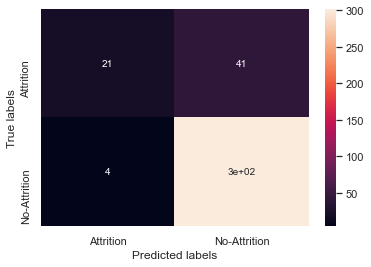

In [69]:
pred_rbf = grid_search_svcr.predict(X_test)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_rbf))

In [70]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[0]))
print ('F1-Score    : {}'.format(fscore[0]))

Recall    : 0.3387096774193548
F1-Score    : 0.48275862068965514


Thus, the accuracy,recall and f1-score of this model for the best parameter - C=100 and gamma = 0.1 are 0.877,0.34 and 0.48  respectively.

In [71]:
Classification_Scores.update({'SVC RBF Kernel':[metrics.accuracy_score(y_test,pred_rbf),recall[0],fscore[0]]})

In [72]:
clf_model_para=clf_model_para.append({'Classifier':'SVC RBF Kernel',
                                      'Best Parameters':grid_search_svcr.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_rbf),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC - Poly



In [73]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'degree': 1, 'C': 0.01, 'gamma': 100}


The best paramaters for this kernel are `degree = 1`, `gamma = 100` and `C = 0.01` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [74]:
svc_poly_grid = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = best_Gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.83783784 0.83783784 0.84545455 0.84545455 0.84545455 0.84545455
 0.84545455 0.83636364 0.83636364 0.83636364]
Average cross-validation score: 0.84


The average cross-validation score for the best parameters is 0.84.

Let's check for the best parameter using GridSearchCV:

In [75]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcp = GridSearchCV(SVC(kernel='poly'), param_grid, cv=10, return_train_score=True)

grid_search_svcp.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_svcp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcp.best_score_))

Best parameters: {'C': 0.1, 'degree': 1, 'gamma': 100}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are degree = 1, C = 1 and gamma = 100.

Compared to the best parameters we got from naive grid search (degree = 1, C = 1 and gamma = 100), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are degree = 1, C = 1 and gamma = 100. 

0.8777173913043478
              precision    recall  f1-score   support

           0       0.84      0.34      0.48        62
           1       0.88      0.99      0.93       306

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.87      0.88      0.86       368



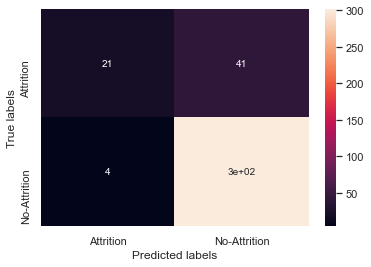

In [76]:
pred_poly = grid_search_svcp.predict(X_test)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_poly))

In [77]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[0]))
print ('FScore    : {}'.format(fscore[0]))

Recall    : 0.3387096774193548
FScore    : 0.48275862068965514


Thus, the accuracy,recall and f1score of this model for the best parameter - degree = 1, C = 1 and gamma = 100 are 0.88,0.37 and 0.51 respectively.

In [78]:
Classification_Scores.update({'SVC Poly Kernel':[metrics.accuracy_score(y_test,pred_poly),recall[0],fscore[0]]})

In [79]:
clf_model_para=clf_model_para.append({'Classifier':'SVC Poly Kernel',
                                      'Best Parameters':grid_search_svcp.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_poly),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC-linear

In [80]:
from sklearn.svm import SVC
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='linear', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'degree': 1, 'C': 1, 'gamma': 0.001}


The best paramaters for this kernel are `degree = 1`, `gamma = 0.001` and `C = 1` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc_poly_grid = SVC(kernel='linear',degree = best_Degree, C=best_C, gamma = best_gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.86486486 0.87387387 0.87272727 0.88181818 0.9        0.88181818
 0.84545455 0.86363636 0.89090909 0.9       ]
Average cross-validation score: 0.88


The average cross-validation score for the best parameters is 0.88.

Let's check for the best parameter using GridSearchCV:

In [82]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcl = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, return_train_score=True)

grid_search_svcl.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

Best parameters: {'C': 10, 'degree': 1, 'gamma': 0.001}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are degree = 1, C = 100 and gamma = 0.001.

Compared to the best parameters we got from naive grid search (degree = 1, C = 100 and gamma = 0.001), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are degree = 1, C = 100 and gamma = 0.001. 

0.8777173913043478
              precision    recall  f1-score   support

           0       0.84      0.34      0.48        62
           1       0.88      0.99      0.93       306

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.87      0.88      0.86       368



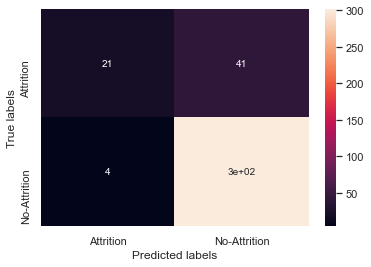

In [83]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_linear = grid_search_svcl.predict(X_test)
print(metrics.accuracy_score(y_test,pred_linear))

confusion = confusion_matrix(y_test, pred_linear)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_linear))

Thus, the accuracy,recall and f1score of this model for the best parameter - degree = 1, C = 1 and gamma = 100 are 0.88,0.37 and 0.51 respectively.

In [84]:
Classification_Scores.update({'SVM Poly Linear':scores.mean()})

In [85]:
clf_model_para = clf_model_para.append({'Regressor':'SVM Linear',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':best_parameters},ignore_index=True)

### Decision Tree



In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.785


We are getting an accuracy of 1.00 on the training set as it goes till highest depth. We are getting an accuracy of 0.774 on the testing set.

Let us check for the average cross-validation score for this model using cross_val_score. 

In [37]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.74774775 0.78378378 0.78181818 0.80909091 0.78181818 0.76363636
 0.72727273 0.77272727 0.84545455 0.79090909]
Average cross-validation score: 0.78


In [38]:
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search_dtree.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8}
Best cross-validation score: 0.86


0.842391304347826
              precision    recall  f1-score   support

           0       0.64      0.15      0.24        62
           1       0.85      0.98      0.91       306

    accuracy                           0.84       368
   macro avg       0.75      0.56      0.57       368
weighted avg       0.82      0.84      0.80       368



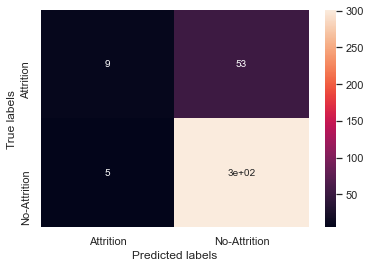

In [89]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_tree = grid_search_dtree.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_tree))

In [90]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.14516129032258066
F1Score    : 0.2368421052631579


Thus, the accuracy,recall and f1 score of this model are 0.774,0.274 and 0.291 respectively.

In [91]:
Classification_Scores.update({'Decison Tree':[metrics.accuracy_score(y_test,pred_tree),recall[0],fscore[0]]})

In [92]:
clf_model_para=clf_model_para.append({'Classifier':'Decision Tree',
                                      'Best Parameters':' ',
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_tree),
                                      'Recall of 0':recall[0]},ignore_index=True)

# Project Part 2

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

### Hard Voting Classifier

In [95]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
hardvoting_clf = VotingClassifier(estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('svc', grid_search_svcr)], voting='hard')
hardvoting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (grid_search_log, grid_search_knn, grid_search_svcr, hardvoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

GridSearchCV 0.8614130434782609
GridSearchCV 0.8369565217391305
GridSearchCV 0.8722826086956522
VotingClassifier 0.8777173913043478


0.8777173913043478
              precision    recall  f1-score   support

           0       0.95      0.29      0.44        62
           1       0.87      1.00      0.93       306

    accuracy                           0.88       368
   macro avg       0.91      0.64      0.69       368
weighted avg       0.89      0.88      0.85       368



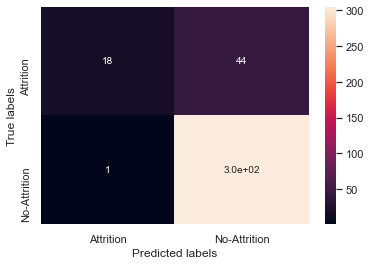

In [96]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_hardvotingclf = hardvoting_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_hardvotingclf))

confusion = confusion_matrix(y_test, pred_hardvotingclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_hardvotingclf))

In [97]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_hardvotingclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.2903225806451613
F1Score    : 0.4444444444444444


In [98]:
Classification_Scores.update({'Hard-Voting Classifier':[metrics.accuracy_score(y_test,pred_hardvotingclf),recall[0],fscore[0]]})

### Soft Voting Classifier

In [99]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
softvoting_clf = VotingClassifier(estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('dtree',grid_search_dtree)], voting='soft')
softvoting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (grid_search_log, grid_search_knn, grid_search_dtree, softvoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

GridSearchCV 0.8614130434782609
GridSearchCV 0.8369565217391305
GridSearchCV 0.8505434782608695
VotingClassifier 0.8559782608695652


0.8559782608695652
              precision    recall  f1-score   support

           0       0.91      0.16      0.27        62
           1       0.85      1.00      0.92       306

    accuracy                           0.86       368
   macro avg       0.88      0.58      0.60       368
weighted avg       0.86      0.86      0.81       368



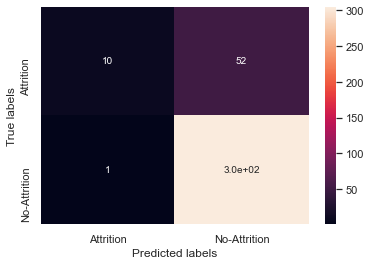

In [100]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_softvotingclf = softvoting_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_softvotingclf))

confusion = confusion_matrix(y_test, pred_softvotingclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_softvotingclf))

In [101]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_softvotingclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16129032258064516
F1Score    : 0.273972602739726


In [102]:
Classification_Scores.update({'Soft-Voting Classifier':[metrics.accuracy_score(y_test,pred_softvotingclf),recall[0],fscore[0]]})

### Bagging on Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),bootstrap=True,n_jobs=-1,random_state=0,max_features=0.5,n_estimators=500,max_samples=0.6)

bag_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.861


In [104]:
scores = cross_val_score(bag_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.84684685 0.83783784 0.84545455 0.87272727 0.87272727 0.87272727
 0.86363636 0.85454545 0.86363636 0.84545455]
Average cross-validation score: 0.86


In [105]:
param_grid = {'max_samples': [0.5,0.6,0.8],
             'max_features': [0.4,0.5,0.6],
             'n_estimators': [100,300,500]}

grid_search_bagclf = GridSearchCV(BaggingClassifier(random_state=0,bootstrap=True,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_bagclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_bagclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagclf.best_score_))

Best parameters: {'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 100}
Best cross-validation score: 0.86


0.8586956521739131
              precision    recall  f1-score   support

           0       0.81      0.21      0.33        62
           1       0.86      0.99      0.92       306

    accuracy                           0.86       368
   macro avg       0.84      0.60      0.63       368
weighted avg       0.85      0.86      0.82       368



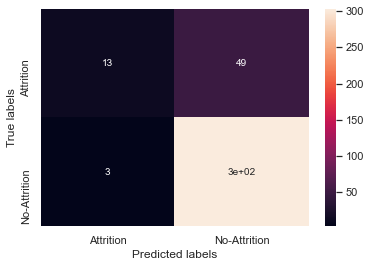

In [106]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_bagclf = grid_search_bagclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_bagclf))

confusion = confusion_matrix(y_test, pred_bagclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_bagclf))

In [107]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_bagclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.20967741935483872
F1Score    : 0.33333333333333337


In [108]:
Classification_Scores.update({'Bagging on Decision Tree':[metrics.accuracy_score(y_test,pred_bagclf),recall[0],fscore[0]]})

### Pasting on Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

paste_clf = BaggingClassifier(DecisionTreeClassifier(),bootstrap=False,n_jobs=-1,random_state=0,max_features=0.6,n_estimators=450,max_samples=0.5)

paste_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(paste_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(paste_clf.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.864


In [110]:
scores = cross_val_score(paste_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.84684685 0.83783784 0.83636364 0.87272727 0.88181818 0.86363636
 0.85454545 0.85454545 0.86363636 0.83636364]
Average cross-validation score: 0.85


In [111]:
param_grid = {'max_samples': [0.4,0.5,0.6],
             'max_features': [0.4,0.5,0.6],
             'n_estimators': [300,400,500]}

grid_search_pasteclf = GridSearchCV(BaggingClassifier(random_state=0,bootstrap=False,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_pasteclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_pasteclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pasteclf.best_score_))

Best parameters: {'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 400}
Best cross-validation score: 0.86


0.8641304347826086
              precision    recall  f1-score   support

           0       0.88      0.23      0.36        62
           1       0.86      0.99      0.92       306

    accuracy                           0.86       368
   macro avg       0.87      0.61      0.64       368
weighted avg       0.87      0.86      0.83       368



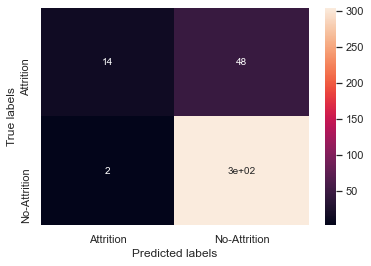

In [112]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_pasteclf = grid_search_pasteclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_pasteclf))

confusion = confusion_matrix(y_test, pred_pasteclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_pasteclf))

In [113]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_pasteclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.22580645161290322
F1Score    : 0.358974358974359


In [114]:
Classification_Scores.update({'Pasting on Decision Tree':[metrics.accuracy_score(y_test,pred_pasteclf),recall[0],fscore[0]]})

### Bagging on K Nearest Neighbors

In [115]:
from sklearn.ensemble import BaggingClassifier

bagknn_clf = BaggingClassifier(KNeighborsClassifier(), bootstrap=True, n_jobs=-1, random_state=0)

bagknn_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.886
Accuracy on test set: 0.837


In [116]:
scores = cross_val_score(bagknn_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.78378378 0.86486486 0.85454545 0.83636364 0.89090909 0.86363636
 0.83636364 0.85454545 0.82727273 0.84545455]
Average cross-validation score: 0.85


In [117]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_bagclf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),random_state=0,bootstrap=True,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_bagclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_bagclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagclf.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 100}
Best cross-validation score: 0.85


0.8369565217391305
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        62
           1       0.84      1.00      0.91       306

    accuracy                           0.84       368
   macro avg       0.92      0.52      0.49       368
weighted avg       0.86      0.84      0.77       368



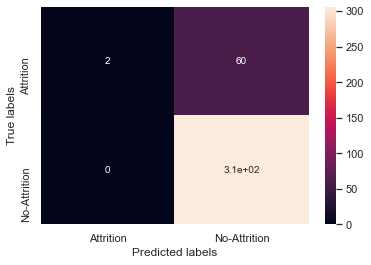

In [118]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_bagknn_clf = grid_search_bagclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_bagknn_clf))

confusion = confusion_matrix(y_test, pred_bagknn_clf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_bagknn_clf))

In [119]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_bagknn_clf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.03225806451612903
F1Score    : 0.0625


In [120]:
Classification_Scores.update({'Bagging on K Nearest Neighbors':[metrics.accuracy_score(y_test,pred_bagclf),recall[0],fscore[0]]})

### Pasting on K Nearest Neighbors

In [121]:
from sklearn.ensemble import BaggingClassifier

pasteknn_clf = BaggingClassifier(KNeighborsClassifier(), bootstrap=False, n_jobs=-1, random_state=0)

pasteknn_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.886
Accuracy on test set: 0.837


In [122]:
scores = cross_val_score(bagknn_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.78378378 0.86486486 0.85454545 0.83636364 0.89090909 0.86363636
 0.83636364 0.85454545 0.82727273 0.84545455]
Average cross-validation score: 0.85


In [123]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_pasteknnclf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),random_state=0,bootstrap=False,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_pasteknnclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_pasteknnclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pasteknnclf.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 100}
Best cross-validation score: 0.84


0.842391304347826
              precision    recall  f1-score   support

           0       0.62      0.16      0.26        62
           1       0.85      0.98      0.91       306

    accuracy                           0.84       368
   macro avg       0.74      0.57      0.58       368
weighted avg       0.81      0.84      0.80       368



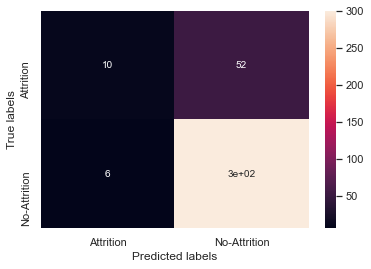

In [124]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_pasteclf = pasteknn_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_pasteclf))

confusion = confusion_matrix(y_test, pred_pasteclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_pasteclf))

In [125]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_pasteclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16129032258064516
F1Score    : 0.2564102564102564


In [126]:
Classification_Scores.update({'Pasting on K Nearest Neighbors':[metrics.accuracy_score(y_test,pred_pasteclf),recall[0],fscore[0]]})

### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.840


0.8396739130434783
              precision    recall  f1-score   support

           0       0.71      0.08      0.14        62
           1       0.84      0.99      0.91       306

    accuracy                           0.84       368
   macro avg       0.78      0.54      0.53       368
weighted avg       0.82      0.84      0.78       368



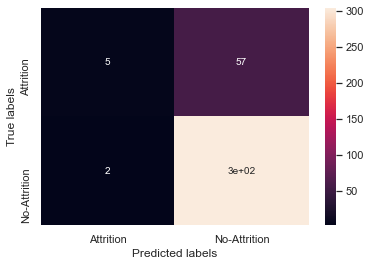

In [128]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_forestclf = forest.predict(X_test)
print(metrics.accuracy_score(y_test,pred_forestclf))

confusion = confusion_matrix(y_test, pred_forestclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_forestclf))

In [129]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_forestclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.08064516129032258
F1Score    : 0.14492753623188404


In [130]:
Classification_Scores.update({'Random Forest':[metrics.accuracy_score(y_test,pred_forestclf),recall[0],fscore[0]]})

In [131]:
forest.feature_importances_

array([0.06746401, 0.01434077, 0.04705467, 0.05138766, 0.01863639,
       0.02693898, 0.00953236, 0.04898935, 0.02638776, 0.02091603,
       0.02874591, 0.07507994, 0.05405164, 0.02995426, 0.04374711,
       0.03280636, 0.00653885, 0.0187884 , 0.        , 0.0227127 ,
       0.05476696, 0.0253001 , 0.02407589, 0.03986054, 0.0233802 ,
       0.02851655, 0.03015399, 0.00128568, 0.0075316 , 0.00739879,
       0.00679752, 0.00235929, 0.00717997, 0.00179562, 0.00404902,
       0.01370113, 0.00123335, 0.00216151, 0.00150016, 0.01074745,
       0.01068265, 0.00325189, 0.00529573, 0.00857961, 0.01496687,
       0.00218896, 0.00940957, 0.00775625])

# Principal Component Analysis

In [132]:
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=0.95)

In [133]:
X_train_pca= pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

(826, 30)
(826,)
(368, 30)
(368,)


In [134]:
X_valid_pca= pca.transform(X_valid)
X_trainval_pca=pca.fit_transform(X_trainval)

## KNN Classification with PCA

Best score: 0.84
Best parameters: {'K': 6}


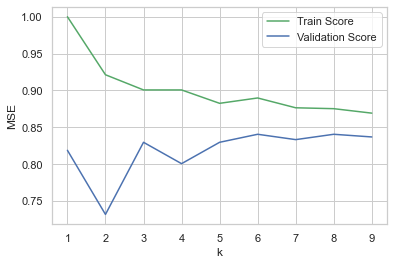

In [135]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train_pca, y_train)
    train_score_array.append(knn_clf.score(X_train_pca, y_train))
    score = knn_clf.score(X_valid_pca, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8018018  0.84684685 0.85454545 0.84545455 0.88181818 0.83636364
 0.83636364 0.86363636 0.82727273 0.84545455]
Average cross-validation score: 0.84


Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.85


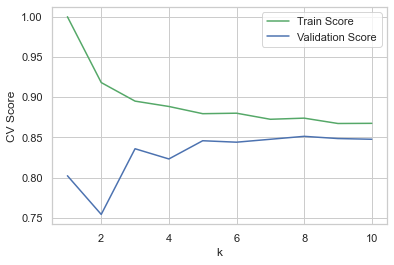

In [137]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

grid_search_knn.fit(X_trainval_pca, y_trainval)

df = pd.DataFrame(grid_search_knn.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('CV Score')

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

0.845108695652174
              precision    recall  f1-score   support

           0       0.67      0.16      0.26        62
           1       0.85      0.98      0.91       306

    accuracy                           0.85       368
   macro avg       0.76      0.57      0.59       368
weighted avg       0.82      0.85      0.80       368



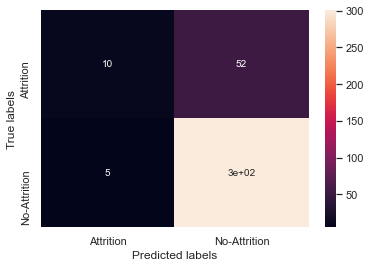

In [138]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

 
pred_knn = grid_search_knn.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_knn))

In [139]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16129032258064516
F1Score    : 0.2597402597402597


In [140]:
Classification_Scores.update({'KNN Classification with PCA':[metrics.accuracy_score(y_test,pred_knn),recall[0],fscore[0]]})

## Logistic Regression with PCA

Best score: 0.87
Best parameters: {'C': 1, 'penalty': 'l2'}


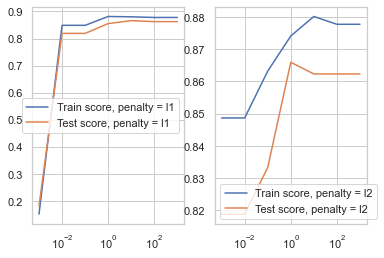

In [141]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs')
    
    log_l1.fit(X_train_pca, y_train)
    log_l2.fit(X_train_pca, y_train)
    
    train_score_l1.append(log_l1.score(X_train_pca, y_train))
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    
    score = log_l1.score(X_valid_pca, y_valid)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_valid_pca, y_valid)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [142]:
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C)

scores = cross_val_score(log_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88288288 0.86486486 0.87272727 0.86363636 0.9        0.88181818
 0.82727273 0.86363636 0.88181818 0.89090909]
Average cross-validation score: 0.87


In [143]:
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_log = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_log.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.87


0.842391304347826
              precision    recall  f1-score   support

           0       0.58      0.23      0.33        62
           1       0.86      0.97      0.91       306

    accuracy                           0.84       368
   macro avg       0.72      0.60      0.62       368
weighted avg       0.81      0.84      0.81       368



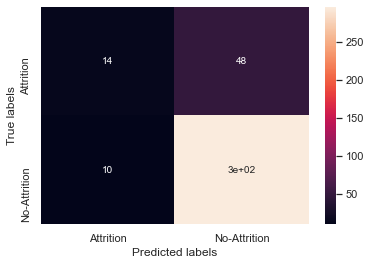

In [144]:
pred_log = grid_search_log.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_log))

In [145]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.22580645161290322
F1Score    : 0.3255813953488372


In [146]:
Classification_Scores.update({'Logistic Regression with PCA':[metrics.accuracy_score(y_test,pred_log),recall[0],fscore[0]]})

## Linear SVC with PCA

Best score: 0.86
Best parameters: {'C': 0.1}


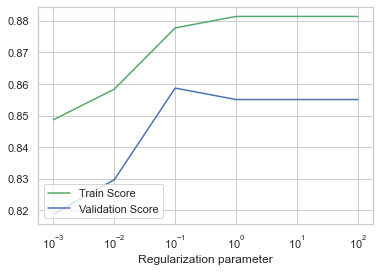

In [147]:
from sklearn.svm import LinearSVC

train_score_list = []
valid_score_list = []

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    linear_svc = LinearSVC(C=C, max_iter=10000)
    linear_svc.fit(X_train_pca,y_train)
    train_score_list.append(linear_svc.score(X_train_pca,y_train))
    score = linear_svc.score(X_valid_pca, y_valid)
    valid_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
        best_C = C

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization parameter')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [148]:
linear_svc_grid = LinearSVC(C = best_C, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_trainval_pca, y_trainval, cv = 10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.87387387 0.87387387 0.86363636 0.86363636 0.9        0.88181818
 0.82727273 0.85454545 0.88181818 0.88181818]
Average cross-validation score: 0.87


Best parameters: {'C': 10}
Best cross-validation score: 0.87


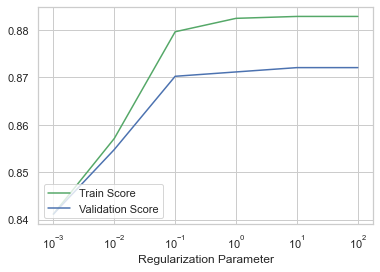

In [149]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lsvc = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_lsvc.fit(X_trainval_pca, y_trainval)

df = pd.DataFrame(grid_search_lsvc.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

0.8369565217391305
              precision    recall  f1-score   support

           0       0.54      0.21      0.30        62
           1       0.86      0.96      0.91       306

    accuracy                           0.84       368
   macro avg       0.70      0.59      0.61       368
weighted avg       0.80      0.84      0.81       368



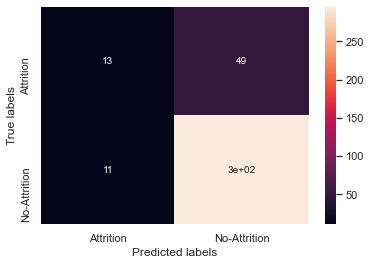

In [150]:
pred_linear_svc = grid_search_lsvc.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_linear_svc)) 

In [151]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.20967741935483872
F1Score    : 0.3023255813953488


In [152]:
Classification_Scores.update({'Linear SVC with PCA':[metrics.accuracy_score(y_test,pred_linear_svc),recall[0],fscore[0]]})

## SVC-rbf with PCA

In [153]:
from sklearn.svm import SVC

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train_pca,y_train)
        train_score_list.append(svc_rbf.score(X_train_pca,y_train))
        score = svc_rbf.score(X_valid_pca, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.86
Best parameters: {'gamma': 0.01, 'C': 100}


In [154]:
svc_rbf_grid = SVC(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svc_rbf_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.86486486 0.87387387 0.88181818 0.89090909 0.86363636 0.88181818
 0.87272727 0.85454545 0.85454545 0.89090909]
Average cross-validation score: 0.87


In [155]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svcr = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, return_train_score=True)

grid_search_svcr.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_svcr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcr.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.87


0.8505434782608695
              precision    recall  f1-score   support

           0       0.68      0.21      0.32        62
           1       0.86      0.98      0.92       306

    accuracy                           0.85       368
   macro avg       0.77      0.60      0.62       368
weighted avg       0.83      0.85      0.82       368



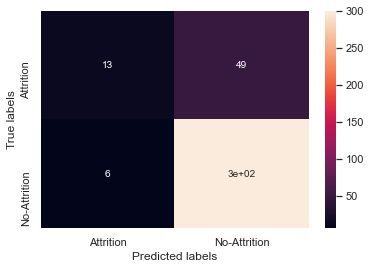

In [156]:
pred_rbf = grid_search_svcr.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_rbf))

In [157]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.20967741935483872
F1Score    : 0.3209876543209877


In [158]:
Classification_Scores.update({'SVC-rbf with PCA':[metrics.accuracy_score(y_test,pred_rbf),recall[0],fscore[0]]})

## SCV-poly with PCA

In [159]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train_pca,y_train)
            train_score_list.append(svc_poly.score(X_train_pca,y_train))
            score = svc_poly.score(X_valid_pca, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.85
Best parameters: {'degree': 1, 'C': 100, 'gamma': 10}


In [160]:
svc_poly_grid = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = best_Gamma)

scores = cross_val_score(svc_poly_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88288288 0.86486486 0.89090909 0.85454545 0.88181818 0.87272727
 0.83636364 0.85454545 0.87272727 0.88181818]
Average cross-validation score: 0.87


In [161]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcp = GridSearchCV(SVC(kernel='poly'), param_grid, cv=10, return_train_score=True)

grid_search_svcp.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_svcp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcp.best_score_))

Best parameters: {'C': 1, 'degree': 1, 'gamma': 100}
Best cross-validation score: 0.88


0.8288043478260869
              precision    recall  f1-score   support

           0       0.48      0.16      0.24        62
           1       0.85      0.96      0.90       306

    accuracy                           0.83       368
   macro avg       0.66      0.56      0.57       368
weighted avg       0.79      0.83      0.79       368



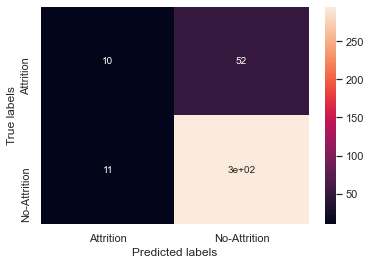

In [162]:
pred_poly = grid_search_svcp.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_poly))

In [163]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16129032258064516
F1Score    : 0.24096385542168675


In [164]:
Classification_Scores.update({'SVC-poly with PCA':[metrics.accuracy_score(y_test,pred_poly),recall[0],fscore[0]]})

## SVC Linear with PCA

In [165]:
from sklearn.svm import SVC
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='linear', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train_pca,y_train)
            train_score_list.append(svc_poly.score(X_train_pca,y_train))
            score = svc_poly.score(X_valid_pca, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.84
Best parameters: {'degree': 1, 'C': 10, 'gamma': 0.001}


In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc_poly_grid = SVC(kernel='linear',degree = best_Degree, C=best_C, gamma = best_gamma)

scores = cross_val_score(svc_poly_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88288288 0.85585586 0.89090909 0.86363636 0.9        0.87272727
 0.83636364 0.86363636 0.89090909 0.89090909]
Average cross-validation score: 0.87


In [167]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcl = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, return_train_score=True)

grid_search_svcl.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

Best parameters: {'C': 100, 'degree': 1, 'gamma': 0.001}
Best cross-validation score: 0.88


0.8288043478260869
              precision    recall  f1-score   support

           0       0.48      0.16      0.24        62
           1       0.85      0.96      0.90       306

    accuracy                           0.83       368
   macro avg       0.66      0.56      0.57       368
weighted avg       0.79      0.83      0.79       368



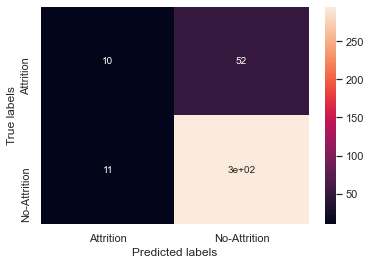

In [168]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_linear = grid_search_svcl.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_linear))

confusion = confusion_matrix(y_test, pred_linear)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_linear))

In [169]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16129032258064516
F1Score    : 0.24096385542168675


In [170]:
Classification_Scores.update({'SVC-linear with PCA':[metrics.accuracy_score(y_test,pred_linear),recall[0],fscore[0]]})

## Decision Tree with PCA

In [171]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_trainval_pca, y_trainval)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_trainval_pca, y_trainval)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.753


In [172]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_trainval_pca, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.72072072 0.79279279 0.77272727 0.74545455 0.72727273 0.77272727
 0.75454545 0.8        0.80909091 0.81818182]
Average cross-validation score: 0.77


In [173]:
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search_dtree.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7}
Best cross-validation score: 0.85


0.8206521739130435
              precision    recall  f1-score   support

           0       0.40      0.13      0.20        62
           1       0.84      0.96      0.90       306

    accuracy                           0.82       368
   macro avg       0.62      0.54      0.55       368
weighted avg       0.77      0.82      0.78       368



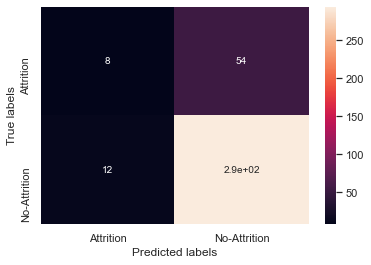

In [174]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_tree = grid_search_dtree.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_tree))

In [175]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.12903225806451613
F1Score    : 0.1951219512195122


In [176]:
Classification_Scores.update({'Decision Tree with PCA':[metrics.accuracy_score(y_test,pred_tree),recall[0],fscore[0]]})

## Neural Networks 

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [178]:
import tensorflow as tf

In [179]:
model = Sequential()
model.add(Dense(12, input_dim=48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [180]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [181]:
X_train=np.asarray(X_train)
y_train = np.asarray(y_train)
X_test=np.asarray(X_test)
y_test = np.asarray(y_test)

In [182]:
from tensorflow import keras
neural_model=model.fit(X_train, y_train, epochs=150, batch_size=10)

Train on 826 samples
Epoch 1/150
826/826 [==============================] - 4s 5ms/sample - loss: 0.4511 - accuracy: 0.8475
Epoch 2/150
826/826 [==============================] - 0s 323us/sample - loss: 0.3964 - accuracy: 0.8487
Epoch 3/150
826/826 [==============================] - 0s 286us/sample - loss: 0.3823 - accuracy: 0.8487
Epoch 4/150
826/826 [==============================] - 0s 251us/sample - loss: 0.3694 - accuracy: 0.8487
Epoch 5/150
826/826 [==============================] - 0s 226us/sample - loss: 0.3556 - accuracy: 0.8487
Epoch 6/150
826/826 [==============================] - 0s 296us/sample - loss: 0.3444 - accuracy: 0.8559
Epoch 7/150
826/826 [==============================] - 0s 264us/sample - loss: 0.3378 - accuracy: 0.8584
Epoch 8/150
826/826 [==============================] - 0s 239us/sample - loss: 0.3301 - accuracy: 0.8656
Epoch 9/150
826/826 [==============================] - 0s 228us/sample - loss: 0.3256 - accuracy: 0.8717
Epoch 10/150
826/826 [==============

In [183]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

368/368 [==============================] - 0s 401us/sample - loss: 0.6914 - accuracy: 0.8342

accuracy: 83.42%


<Figure size 4032x360 with 0 Axes>

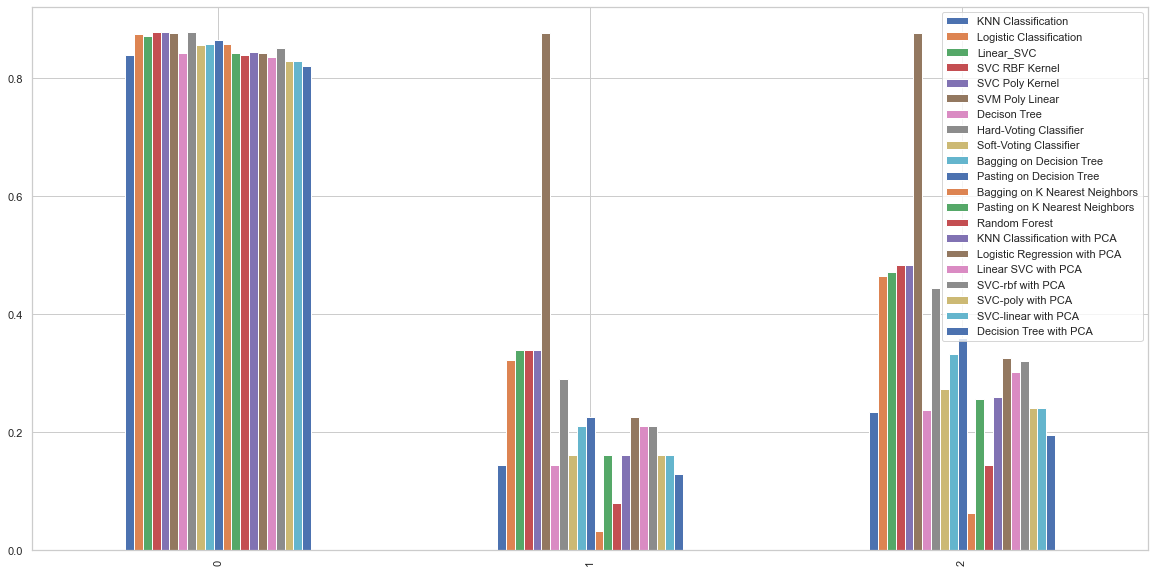

In [185]:
plt.figure(figsize=(56,5))

Classification_Scores.plot.bar(figsize=(20,10))

In [57]:
import pandas as pd
project_1=pd.DataFrame({"classifier":["KNN Classification without PCA","KNN Classification with PCA","Logistic Regression without PCA","Logistic Regression with PCA","Linear_SVC without PCA","Linear_SVC with PCA","SVC_RBF Kernel without PCA","SVC_RBF Kernel with PCA","SVC_Poly Kernel without PCA","SVC_Poly Kernel with PCA","SVC_Linear Kernel with PCA","SVC_Linear without PCA","Decision Tree without PCA","Decision Tree with PCA","Hard Voting Classifier","Soft Voting Classifier","Bagging on Decision Trees","Pasting on Decison Trees","Bagging on K Nearest Neighbors","Pasting on K Nearest Neighbors","Random Forest","Adaboost with Decision Tree","Adaboost with KNN"],"Accuracy":[0.84,0.85,0.88,0.84,0.84,0.84,0.88,0.85,0.88,0.83,0.88,0.83,0.84,0.82,0.88,0.86,0.86,0.88,0.86,0.84,0.84,0.88,0.84],"Recall":[0.15,0.16,0.32,0.23,0.32,0.21,0.34,0.21,0.34,0.16,0.34,0.16,0.15,0.13,0.29,0.16,0.21,0.34,0.03,0.16,0.08,0.16,0],"F1-Score":[0.233,0.26,0.47,0.33,0.47,0.3,0.48,0.32,0.48,0.24,0.47,0.24,0.24,0.2,0.44,0.27,0.33,0.47,0.06,0.26,0.14,0.27,0]})
project_1

,classifier,Accuracy,Recall,F1-Score
0,KNN Classification without PCA,0.84,0.15,0.233
1,KNN Classification with PCA,0.85,0.16,0.260
2,Logistic Regression without PCA,0.88,0.32,0.470
3,Logistic Regression with PCA,0.84,0.23,0.330
4,Linear_SVC without PCA,0.84,0.32,0.470
5,Linear_SVC with PCA,0.84,0.21,0.300
6,SVC_RBF Kernel without PCA,0.88,0.34,0.480
7,SVC_RBF Kernel with PCA,0.85,0.21,0.320
8,SVC_Poly Kernel without PCA,0.88,0.34,0.480
9,SVC_Poly Kernel with PCA,0.83,0.16,0.240


Our evaluation strategy is based on the having best recall value and best F1-Score as the dataset is imbalanced and (as we do not wish to misclassify the employess which are likely to cause `attrition` i.e. have less false negatives in our confusion matrix)

From the above graph, it can be said that we are getting an accuracy of 0.88, recall score of 0.37 and f1-score of 0.51 for
 `SVM - Poly` and we are also getting around same values for Pasting on Decision Trees

Thus, it can be used as an ideal classifier for predicting the attrition rate.

*Please find the adaboost models below. Sorry for the misplacement*

# Adaboost with Decision Tree

In [39]:
train_score_array = []
test_score_array = []
best_score=0


for n in range(1,10):
    for learning_rate in [0.001,0.01]:
        for n_estimators in [50,100]:
            dtree_reg=DecisionTreeClassifier(max_depth=n)
            ada_reg_dtree = AdaBoostClassifier(dtree_reg, n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
            ada_reg_dtree.fit(X_trainval, y_trainval)
            train_score_array.append(ada_reg_dtree.score(X_trainval, y_trainval))
            test_score_array.append(ada_reg_dtree.score(X_test, y_test))
            score=ada_reg_dtree.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': learning_rate, 'max_depth': n,'n_estimators':n_estimators}

print(best_parameters)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [43]:
from sklearn.ensemble import AdaBoostClassifier

dt_reg = DecisionTreeClassifier(max_depth=3,random_state=0)
ada_reg_dt = AdaBoostClassifier(dt_reg, n_estimators=100,learning_rate=0.01,random_state=0)

ada_reg_dt.fit(X_trainval,y_trainval)

y_pred=ada_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_dt.score(X_trainval, y_trainval)*100))
print('Test score: {:.4f} %'.format(ada_reg_dt.score(X_test, y_test)*100))

Train score: 87.5681 %
Test score: 85.0543 %


0.8505434782608695
              precision    recall  f1-score   support

           0       0.77      0.16      0.27        62
           1       0.85      0.99      0.92       306

    accuracy                           0.85       368
   macro avg       0.81      0.58      0.59       368
weighted avg       0.84      0.85      0.81       368



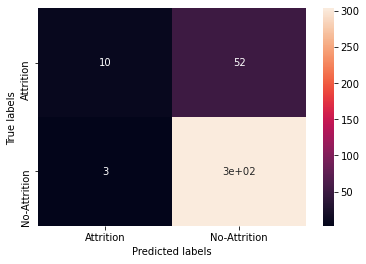

In [52]:
pred_ada = ada_reg_dt.predict(X_test)
print(metrics.accuracy_score(y_test,pred_ada))

confusion = confusion_matrix(y_test, pred_ada)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_ada))

# Adaboost with KNN

In [55]:
from sklearn.svm import SVC
svc_clf=SVC(C=100,gamma=1, kernel='linear',probability=True)
ada_clf_svc = AdaBoostClassifier(svc_clf, n_estimators=500,learning_rate=0.1,random_state=0)
ada_clf_svc.fit(X_trainval, y_trainval)

y_pred=ada_clf_svc.predict(X_test)


In [56]:
print('Train score: {:.4f} %'.format(ada_clf_svc.score(X_trainval, y_trainval)*100))
print('Test score: {:.4f} %'.format(ada_clf_svc.score(X_test, y_test)*100))

Train score: 84.1198 %
Test score: 83.1522 %


0.8315217391304348
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.83      1.00      0.91       306

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.69      0.83      0.76       368



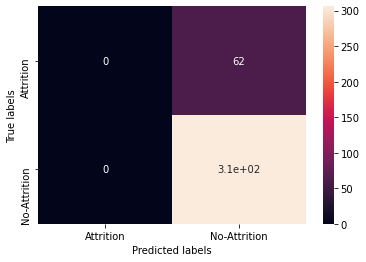

In [53]:
pred_adasvc = ada_clf_svc.predict(X_test)
print(metrics.accuracy_score(y_test,pred_adasvc))

confusion = confusion_matrix(y_test, pred_adasvc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_adasvc))